<h1> Economic Recession Impact Analysis </h1>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')

import plotly.io as pio
pio.renderers.default = 'colab'


In [2]:
# Installing Fred API

!pip install fredapi

<h3> 1. Web Scraping

In [3]:
from fredapi import Fred

In [4]:
fred_key = '09072c295cce82c66592fdfa0d8a0820 '

In [5]:
fred = Fred(api_key = fred_key)
fred

In [6]:
# Searching the data

df= fred.search('S&P', order_by = 'popularity')

In [7]:
df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-01-19,2024-01-19,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-01-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-19 08:09:03-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-01-19,2024-01-19,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-12-26 08:12:02-06:00,85,"For more information regarding the index, plea..."
SP500,SP500,2024-01-19,2024-01-19,S&P 500,2013-12-31,2024-01-19,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-01-19 19:01:01-06:00,82,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-01-19,2024-01-19,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-01-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-19 08:09:07-06:00,81,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2024-01-19,2024-01-19,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,80,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSHICPCZA156NRUG,CSHICPCZA156NRUG,2024-01-19,2024-01-19,Share of Gross Capital Formation at Current Pu...,1990-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:36:33-06:00,3,Source ID: csh_i When using these data in you...
CSHICPLCA156NRUG,CSHICPLCA156NRUG,2024-01-19,2024-01-19,Share of Gross Capital Formation at Current Pu...,1970-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:32:40-06:00,3,Source ID: csh_i When using these data in you...
CSHICPTZA156NRUG,CSHICPTZA156NRUG,2024-01-19,2024-01-19,Share of Gross Capital Formation at Current Pu...,1960-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:32:32-06:00,3,Source ID: csh_i When using these data in you...


<Axes: >

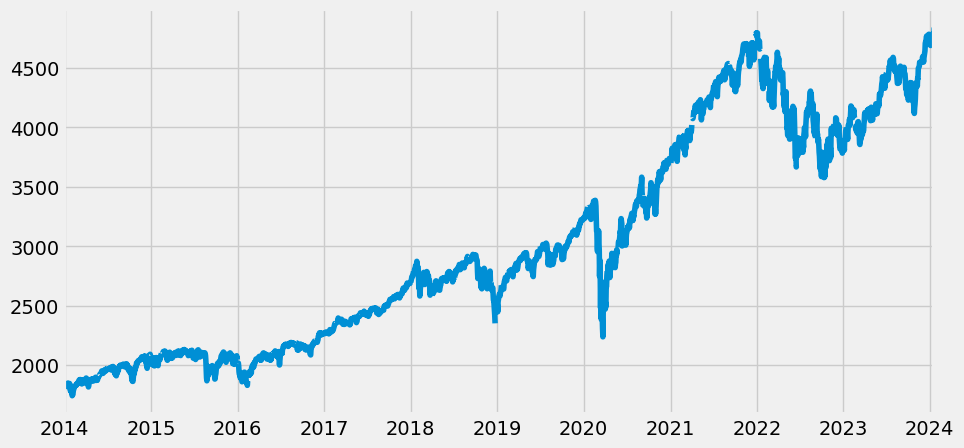

In [8]:
#Extracting data of S&P 500

sp500 = fred.get_series(series_id = 'SP500')
sp500.plot(figsize=(10,5))

<h3> 2. Data Pre-processing

In [9]:
# Extracting the unemployment rate data

unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.8
2023-11-01    3.7
2023-12-01    3.7
Length: 912, dtype: float64

In [10]:
# Querying to get the unemployment rate

unemp_df = fred.search('unemployment rate state',filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]


In [11]:
unemp_df = unemp_df.loc[unemp_df['id'].str.contains('UR')]
unemp_df.shape

(58, 15)

In [12]:
# Creating a new table

all_results = []

for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)
uemp_results = pd.concat(all_results, axis=1)
uemp_states = uemp_results
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[a] for a in uemp_states.columns]


In [13]:
uemp_states

,California,Texas,New York,Florida,Ohio,Alabama,Illinois,Pennsylvania,Michigan,North Carolina,...,Rhode Island,South Dakota,Delaware,Vermont,Midwest Census Region,the United States (DISCONTINUED),New England Census Division,Northeast Census Region,West Census Region,South Census Region
1976-01-01,9.2,5.8,10.3,9.7,8.1,6.6,6.6,8.0,9.9,6.4,...,7.8,3.3,8.0,8.6,6.8,NaN,9.6,9.6,8.6,6.9
1976-02-01,9.2,5.8,10.3,9.7,8.1,6.6,6.6,8.1,9.9,6.4,...,7.8,3.3,8.0,8.6,6.8,NaN,9.6,9.6,8.6,6.9
1976-03-01,9.1,5.9,10.2,9.6,8.1,6.6,6.6,8.1,9.9,6.4,...,7.7,3.2,8.0,8.6,6.8,NaN,9.6,9.6,8.6,6.9
1976-04-01,9.1,5.9,10.2,9.5,8.0,6.5,6.6,8.1,9.8,6.3,...,7.7,3.1,8.1,8.6,6.7,NaN,9.4,9.5,8.5,6.8
1976-05-01,9.0,5.9,10.1,9.3,7.8,6.4,6.6,8.1,9.6,6.1,...,7.7,3.1,8.3,8.5,6.6,NaN,9.3,9.5,8.5,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,4.6,4.1,3.9,2.7,3.3,2.1,4.0,3.5,3.6,3.3,...,2.8,1.9,4.1,1.8,3.2,NaN,2.7,3.5,4.0,3.2
2023-08-01,4.6,4.1,3.9,2.7,3.4,2.1,4.1,3.5,3.7,3.3,...,2.7,1.9,4.1,1.8,3.3,NaN,2.7,3.5,4.0,3.2
2023-09-01,4.7,4.1,4.0,2.8,3.4,2.2,4.4,3.4,3.9,3.4,...,2.6,1.9,4.1,1.9,3.4,NaN,2.7,3.6,4.1,3.2
2023-10-01,4.8,4.1,4.2,2.8,3.6,2.3,4.6,3.4,4.1,3.4,...,2.7,2.0,4.2,2.0,3.6,NaN,2.8,3.7,4.2,3.3


<h3> 3. Data Analysis and Visualization

In [21]:
# Unemployment rate of all the states

px.line(uemp_states).update_layout(xaxis_title = "Year", yaxis_title = "Unemployment rate")

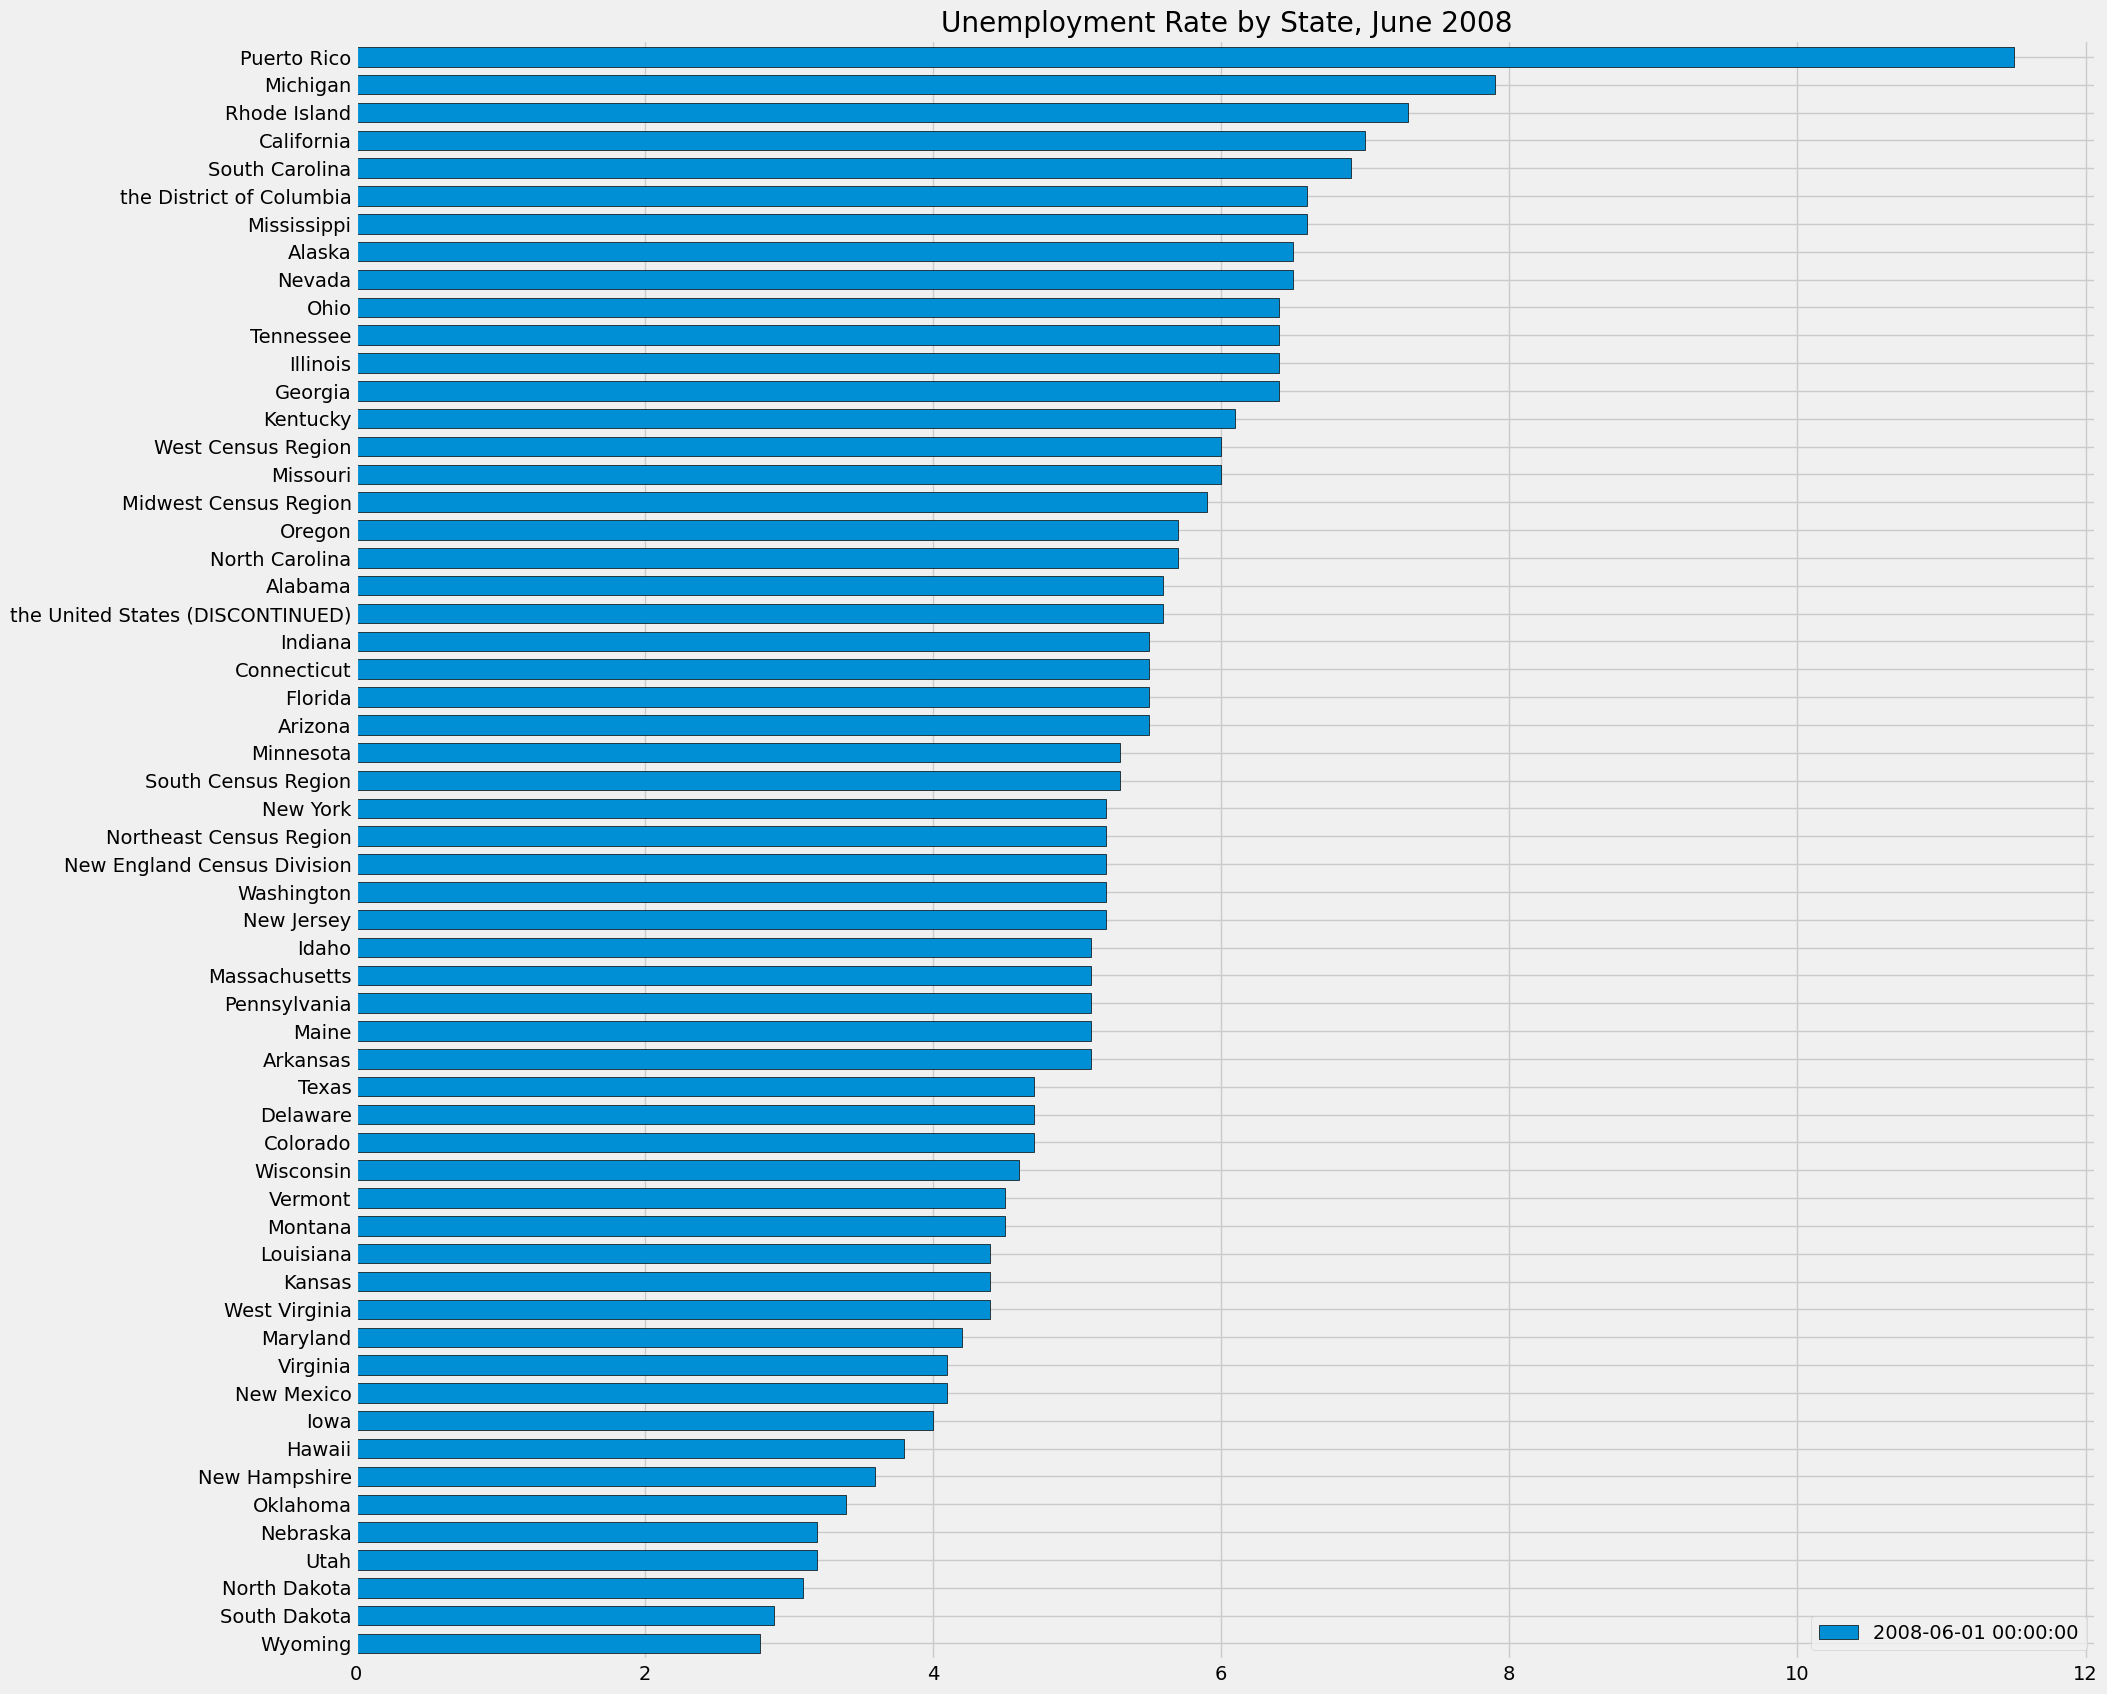

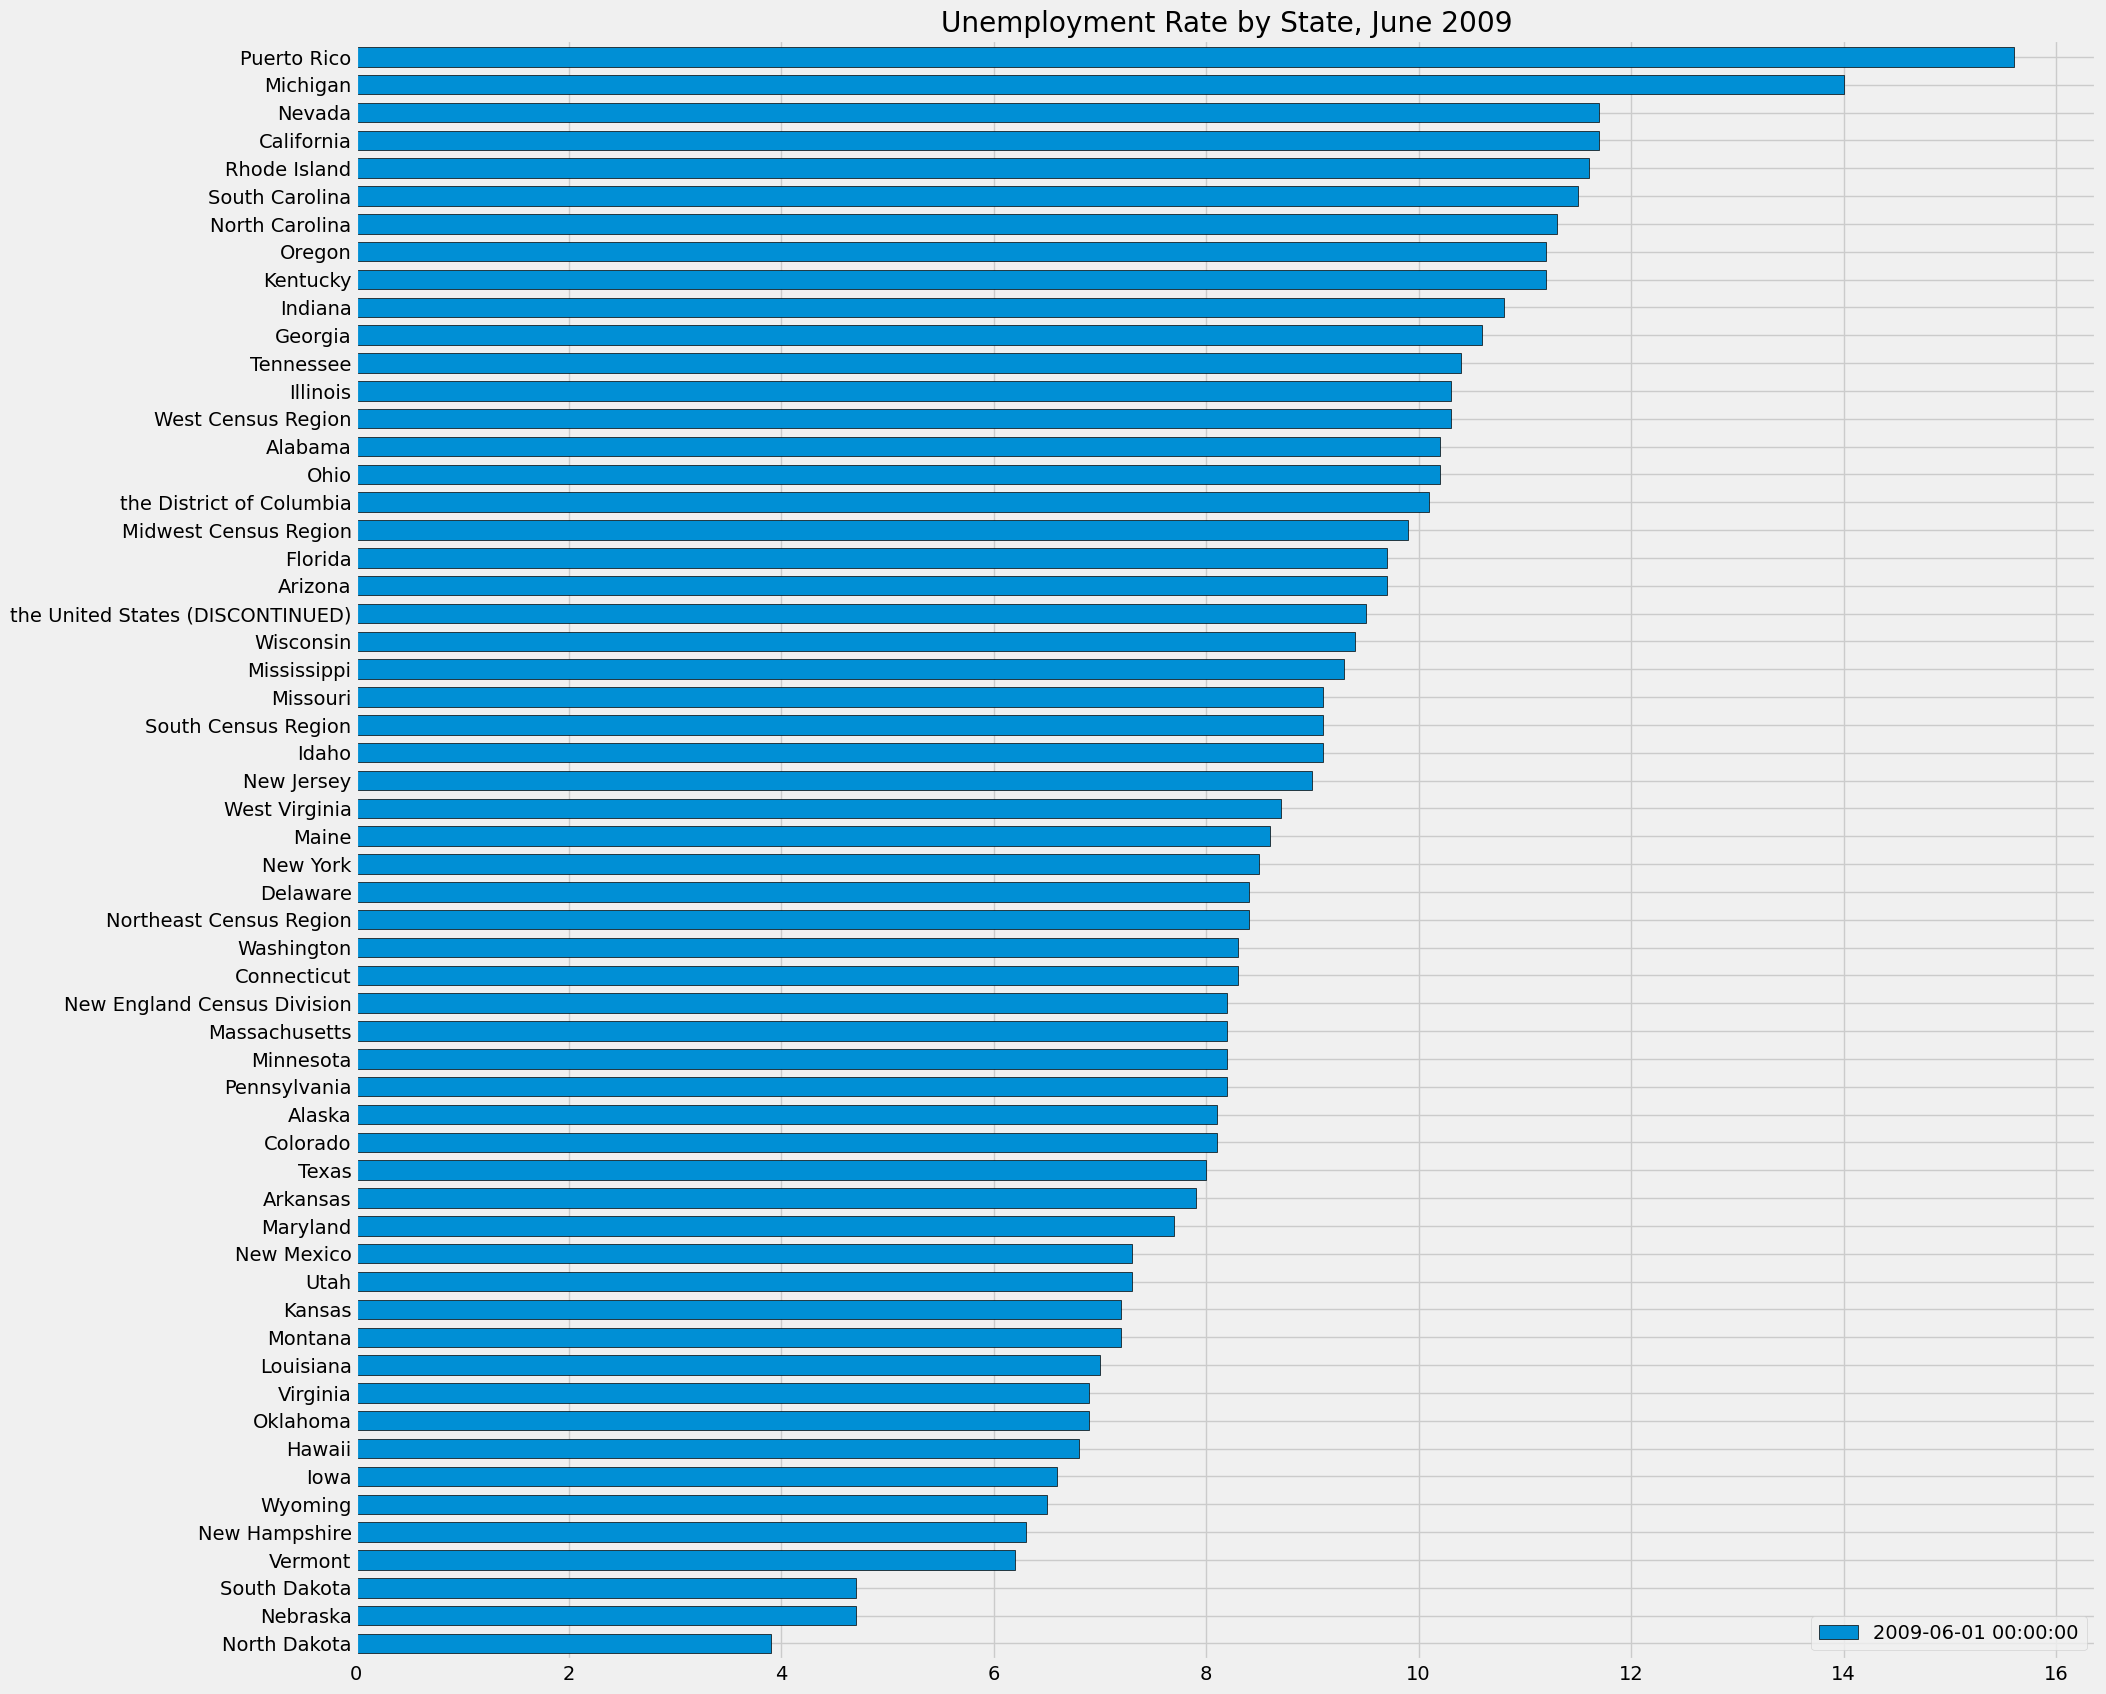

In [15]:
# Plotting bar charts to compare the unemployment rate at the start and end of recession

ax= uemp_states.loc[uemp_states.index=='2008-06-01'].T.sort_values('2008-06-01')\
      .plot(kind='barh',figsize=(20,20),width = 0.7, edgecolor= 'black', title='Unemployment Rate by State, June 2008')

ax1 = uemp_states.loc[uemp_states.index=='2009-06-01'].T.sort_values('2009-06-01')\
      .plot(kind='barh',figsize=(20,20),width = 0.7, edgecolor= 'black', title='Unemployment Rate by State, June 2009')




In [16]:
# Comparing with the help of tables

a1 = uemp_states.loc[uemp_states.index=='2008-06-01'].T.sort_values('2008-06-01').reset_index()
a2 = uemp_states.loc[uemp_states.index=='2009-06-01'].T.sort_values('2009-06-01').reset_index()


In [17]:
a2

,index,2009-06-01 00:00:00
0,North Dakota,3.9
1,Nebraska,4.7
2,South Dakota,4.7
3,Vermont,6.2
4,New Hampshire,6.3
5,Wyoming,6.5
6,Iowa,6.6
7,Hawaii,6.8
8,Oklahoma,6.9
9,Virginia,6.9


In [18]:
# Converting dataframes to csv

a1.to_csv()
a2.to_csv()

',index,2009-06-01 00:00:00\n0,North Dakota,3.9\n1,Nebraska,4.7\n2,South Dakota,4.7\n3,Vermont,6.2\n4,New Hampshire,6.3\n5,Wyoming,6.5\n6,Iowa,6.6\n7,Hawaii,6.8\n8,Oklahoma,6.9\n9,Virginia,6.9\n10,Louisiana,7.0\n11,Montana,7.2\n12,Kansas,7.2\n13,Utah,7.3\n14,New Mexico,7.3\n15,Maryland,7.7\n16,Arkansas,7.9\n17,Texas,8.0\n18,Colorado,8.1\n19,Alaska,8.1\n20,Pennsylvania,8.2\n21,Minnesota,8.2\n22,Massachusetts,8.2\n23,New England Census Division,8.2\n24,Connecticut,8.3\n25,Washington,8.3\n26,Northeast Census Region,8.4\n27,Delaware,8.4\n28,New York,8.5\n29,Maine,8.6\n30,West Virginia,8.7\n31,New Jersey,9.0\n32,Idaho,9.1\n33,South Census Region,9.1\n34,Missouri,9.1\n35,Mississippi,9.3\n36,Wisconsin,9.4\n37,the United States (DISCONTINUED),9.5\n38,Arizona,9.7\n39,Florida,9.7\n40,Midwest Census Region,9.9\n41,the District of Columbia,10.1\n42,Ohio,10.2\n43,Alabama,10.2\n44,West Census Region,10.3\n45,Illinois,10.3\n46,Tennessee,10.4\n47,Georgia,10.6\n48,Indiana,10.8\n49,Kentucky,11.2\n50,Ore

In [19]:
uemp_states.loc[uemp_states.index=='2008-06-01'].T.sort_values('2008-06-01').mean()

2008-06-01    5.282759
Freq: MS, dtype: float64

In [20]:
# From research, it was found that the unemployment rate on June 1 2020 was 5.70

# Therefore, the percent change would be:

unemp_2008 = 5.28
unemp_2020 = 5.70
percent_change = round(unemp_2020/unemp_2008,2)*100

print('Percent change = ',percent_change)

Percent change =  108.0
